# Exemplo Prático: Workflow IA

## Classificação de Flores Íris

O objetivo nessa prática é apresentar o workflow básico pra criação de um modelo inteligente para solucionar um problema de classificação. Desta forma, vamos realizar, passo a passo, as quatro principais etapas do processo: Extração de atributos, Divisão dos dados, Treinamento do modelo e Avaliação do modelo.

In [8]:
pip install matplotlib


In [9]:
# Carregar e entender os dados

# biblioteca para carregar e realizar operações tabulares
import pandas as pd

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt 


# dataset, arquivo com os dados sobre a covid19 nas cisdades do BR
arquivo  = 'cases-brazil-cities.csv'

# carregando o conteúdo do arquivo em um objeto pandas.DataFrame
# a partir do método de carregamento de arquivo read_csv
# especificando que a primeira linha contém os nomes do cabeçalho
dataset = pd.read_csv(arquivo, sep=',')
cols = ['deaths','ibgeID', 'totalCases', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', 'newCases',
        'newDeaths']
dataset[cols] = dataset[cols].apply(pd.to_numeric, errors='coerce').fillna(0.0)


# exibindo a dimensão dos dados carregados (linhas, colunas)
dataset.shape

(5596, 14)

In [12]:
# exibindo as 10 primeiras linhas de valores contidos no dataset
dataset.head(10)
# exibindo os 10 últimas linhas de valores do dataset
#dataset.tail(10)

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
0,Brazil,GO,Abadia de Goiás/GO,5200050,50,4074,545.97074,44485.69557,0.01227,MS,2023-03-18,5,0,2023-03-18
1,Brazil,MG,Abadia dos Dourados/MG,3100104,21,1943,299.06010,27670.17944,0.01081,MS,2023-03-18,0,0,2023-03-18
2,Brazil,GO,Abadiânia/GO,5200100,55,2218,263.49830,10626.16778,0.02480,MS,2023-03-18,-1,0,2023-03-18
3,Brazil,PA,Abaetetuba/PA,1500107,244,12009,152.08272,7485.08779,0.02032,MS,2023-03-18,13,0,2023-03-18
4,Brazil,MG,Abaeté/MG,3100203,51,4279,219.23226,18394.01625,0.01192,MS,2023-03-18,0,0,2023-03-18
5,Brazil,CE,Abaiara/CE,2300101,20,1362,167.15420,11383.20100,0.01468,MS,2023-03-18,0,0,2023-03-18
6,Brazil,BA,Abaré/BA,2900207,18,3008,87.40410,14606.19598,0.00598,MS,2023-03-18,0,0,2023-03-18
7,Brazil,PR,Abatiá/PR,4100103,24,1774,326.08696,24103.26087,0.01353,MS,2023-03-18,0,0,2023-03-18
8,Brazil,BA,Abaíra/BA,2900108,17,361,195.82997,4158.50708,0.04709,MS,2023-03-18,0,0,2023-03-18
9,Brazil,SC,Abdon Batista/SC,4200051,4,540,157.85320,21310.18153,0.00741,MS,2023-03-18,0,0,2023-03-18


In [13]:
# para acesssar uma linha aleatória
dataset.iloc[23] #linha especifica
dataset.sample() #linha aleatoria

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths,last_info_date
2647,Brazil,BA,Jussari/BA,2918555,12,890,210.30494,15597.61654,0.01348,MS,2023-03-18,2,0,2023-03-18


In [14]:
# para saber a quantidade mortes por estado
dataset.groupby('state')['deaths'].sum().sort_values(ascending=False)



state
SP    179039
RJ     76852
MG     65507
PR     46022
RS     41921
BA     31459
CE     28157
GO     28041
SC     22703
PE     22687
PA     19025
MT     15090
ES     15041
AM     14443
DF     11845
MA     11053
MS     11016
PB     10542
RN      8715
PI      8354
RO      7432
AL      7242
SE      6502
TO      4232
RR      2180
AP      2167
AC      2043
Name: deaths, dtype: int64

In [15]:
# para obter um resumo estatístico dos dados
dataset.describe()

,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,newCases,newDeaths
count,5.596000e+03,5596.000000,5.596000e+03,5596.000000,5596.000000,5596.000000,5596.00000,5596.000000
mean,3.238474e+06,124.966047,6.627148e+03,264.415356,18658.703740,0.016965,0.00000,0.000000
std,1.007226e+06,916.348086,3.309353e+04,239.989853,11756.863055,0.012580,352.51623,2.162975
min,1.100000e+01,-258.000000,-3.702600e+04,-0.695050,-197.437800,0.000000,-17239.00000,-121.000000
25%,2.510476e+06,11.000000,8.300000e+02,158.520482,10428.822468,0.010000,0.00000,0.000000
50%,3.145389e+06,25.000000,1.721000e+03,239.550075,16981.620075,0.014150,0.00000,0.000000
75%,4.118734e+06,63.000000,4.177000e+03,344.662600,25352.456770,0.020243,2.00000,0.000000
max,5.300108e+06,44671.000000,1.316242e+06,14039.978650,337540.779410,0.312500,10164.00000,52.000000


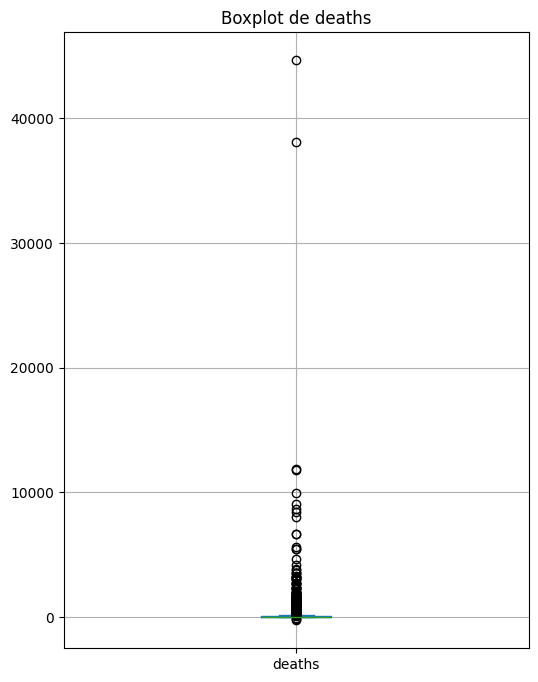

In [16]:
# exibindo um gráfico do tipo 'boxplot' em um grid de 2x2
# com coordenadas independentes
dataset['deaths'].plot.box(figsize=(6,8), grid=True, vert=True, title='Boxplot de deaths')

plt.show()

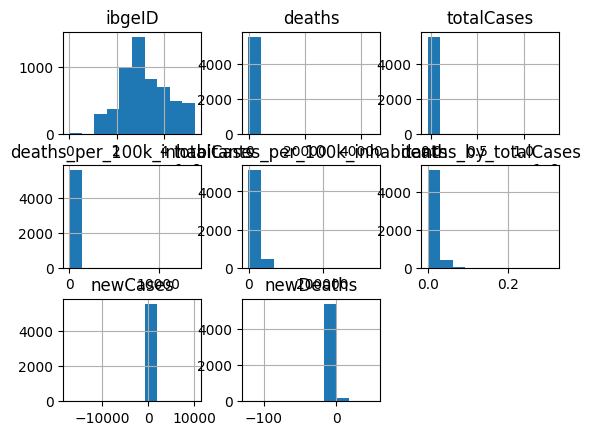

In [17]:
# exibindo um gráfico de histogramas para entender a distribuição dos mesmos
dataset.hist()
plt.show()

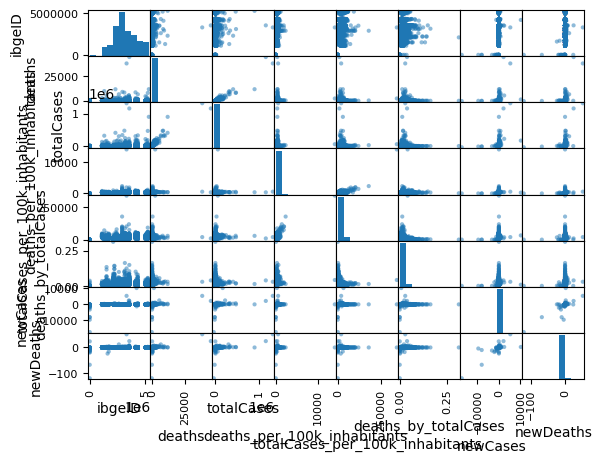

In [18]:
# gráfico tipo 'scatter plot' para verificar correlações entre as variáveis
pd.plotting.scatter_matrix(dataset)
plt.show()


# 2 - Divisão dos dados

Criando dois conjuntos de dados para serem utilizados nas etapas seguintes, treinamento e avaliação.

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/03_divisao_dados.jpg", width="640"/>
</div>

In [4]:
pip install model_selection

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.7 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.6/10.7 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/10.7 MB 3.8 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/10.7 MB 3.8 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/10.7 MB 3.2 MB/s eta 0:00:03
   ----------------- ---------------------- 4.7/10.7 MB 3.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.8/10.7 MB 3.8 MB/s eta 0:00:02
   ------------------------- -------------- 6.8/10.7 MB 4.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.7 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 9.7/10.7 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 4.6 MB/s eta 0:00:01
   ---------

In [3]:
%pip install sklearn

# carregando uma função pertencente ao scikit-learn para realizar
# automaticamente uma amostragem sem reposição aleatória e dividir
# os dados em dois conjuntos
from sklearn.model_selection import train_test_split

# importante lembrar que as 4 primeiras colunas são o nosso 'X'
# ou seja, os dados de entrada do modelo, e que a última coluna
# é o nosso 'y', ou seja, o dado que o modelo deve aprender a predizer
print('exemplo de entrada (x):\n', dataset.iloc[4, :4])
print('exemplo de saída (y):\n', dataset.iloc[4, 4])

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# criando os dados de entrada e saída para treinamento e validação
# usando o método 'values' ele retorna um array bidimensional
# para serem inseridos na função train_test_split
array = dataset.values

X = array[:, :4]
y = array[:, 4]

print("dimensoes de X", X.shape)
print("dimensoes de y", y.shape)

dimensoes de X (5596, 4)
dimensoes de y (5596,)


In [ ]:

# utilizando um critério de divisão percentual 20% na função train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# olhando alguns dados referentes aos conjuntos
print(f'\n dimensao de X_train {X_train.shape} e y_train {y_train.shape}')
print(f'\n dimensao de X_test {X_test.shape} e y_train {y_test.shape}')


 dimensao de X_train (4476, 4) e y_train (4476,)

 dimensao de X_test (1120, 4) e y_train (1120,)


In [ ]:
import pandas as pd

# Exemplo: dataframe com coluna "label" que indica a classe
print(dataset['state'].value_counts())
print(dataset['state'].value_counts(normalize=True))  # porcentagem


state
MG    854
SP    646
RS    498
BA    418
PR    400
SC    296
GO    247
PI    225
PB    224
MA    218
PE    186
CE    185
RN    168
PA    145
MT    142
TO    140
AL    103
RJ     93
MS     80
ES     79
SE     76
AM     63
RO     53
AC     23
AP     17
RR     16
DF      1
Name: count, dtype: int64
state
MG    0.152609
SP    0.115440
RS    0.088992
BA    0.074696
PR    0.071480
SC    0.052895
GO    0.044139
PI    0.040207
PB    0.040029
MA    0.038956
PE    0.033238
CE    0.033059
RN    0.030021
PA    0.025911
MT    0.025375
TO    0.025018
AL    0.018406
RJ    0.016619
MS    0.014296
ES    0.014117
SE    0.013581
AM    0.011258
RO    0.009471
AC    0.004110
AP    0.003038
RR    0.002859
DF    0.000179
Name: proportion, dtype: float64


# 3 - Treinamento do Modelo

Definindo um modelo e realizando o treinamento

<div>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/04_treinamento_modelo.jpg", width="640"/>
</div>

In [1]:
# carregando a classe pra criar um modelo do scikit-learn
from sklearn.svm import SVC

# instanciando um objeto do modelo SVC com parâmetros padrões
model = SVC(gamma='auto')


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# executa o método de treinamento 'fit', para ajustar os parâmetros
# do modelo, a partir de um algoritmo de aprendizagem, em função
# dos valores contidos no conjunto de dados
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['state'] = le.fit_transform(X['state'])

X_train['state'] = le.fit_transform(X_train['state'])
X_train = X_train.drop('state', axis=1)

model.fit(X_train, y_train)

model.fit(X_train, y_train)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# 4 - Avaliação do Modelo

Utilizando o conjunto de dados de teste define-se uma métrica estatística de
avaliação e deduz-se a qualidade do resultado do treinamento

<div>
<br/>
<img src="https://github.com/rafaelmm82/ufpb-ia-20201/raw/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/05_avaliacao_modelo.jpg", width="640"/>
<div/>

In [ ]:
# carregando funções da biblioteca scikit-learn que auxiliam no cálculo
# das avaliações dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# realizando as predições utilizando o conjunto de testes
prediction = model.predict(X_test)


In [ ]:
# para efeitos de comparação e devido ao fato do conjunto ser pequeno
# podemos observar visualmente o resultdo da predição e o valor real do dataset
print("Valores preditos:\n", prediction)
print("Valores esperado:\n", y_test)
print("Comparativo:\n", y_test == prediction)


Valores preditos:
 ['Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica']
Valores esperado:
 ['Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica']
Comparativo:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True]


In [ ]:
# usando funções e métricas mais robustas para avaliar o desempenho
# exibindo a acurácia do modelo para este treinamento
print("Acurácio do modelo:\n", accuracy_score(y_test, prediction))

Acurácio do modelo:
 0.9666666666666667


In [ ]:
# exibindo a matrix confusão VP, FP, VN FN


In [ ]:
# exibindo um relatório mais completo com os índices:
# precisão, recall, f1-score e support


## Qual conclusão podemos tirar do processo de treinamento?

E se, por exemplo, tivéssemos usado outros valores para divisão dos dados?

In [ ]:
# para avaliar o que aconteceria se tivéssemos utilizado outra propoção de dados
# para treino e validação podemos refazer parte do procedimento

# Cria novamente o modelo, treina, prediz e avalia
